In [1]:
wdir = '/Users/xiangxingyu/Downloads/UCB线上科研/data/'

import os
import mne
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import tempfile
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns

%pylab inline
# %matplotlib notebook

from numpy import *
from numpy.random import rand, randn, randint
from dPCA import dPCA

import sys
sys.path.append('./src')

from preprocessing import * 

# mne.set_log_level('CRITICAL')

/Users/xiangxingyu/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
ls = ['0011_U7X', '0012_VK2', '0013_NHJ', '0014_BKO', '0016_HJF', '0017_G8O']

_id_ = ls[5]

if not os.path.exists(_id_):
    os.makedirs(_id_)

_id_number = _id_[:4]

inv_fname = wdir + '01_raw_maxfiltered/' + _id_ + '/inv_raw_tsss.fif'
inv_ica_fname = wdir + '02_ica_solution/' + _id_ + '/inv_raw_tsss-ica.fif'
inv_lfname = wdir + 'working_memory_logs/' + _id_number + '_invert_MEG.csv'

main_fname = wdir + '01_raw_maxfiltered/' + _id_ + '/main_raw_tsss.fif'
main_ica_fname = wdir + '02_ica_solution/' + _id_ + '/main_raw_tsss-ica.fif'
main_lfname = wdir + 'working_memory_logs/' + _id_number + '_recognize_MEG.csv'


recall_epochs = WM_epoching(inv_fname,inv_ica_fname,-1, 4, 
                      baseline = (-1,0),notch_filter=50, h_freq=20,
                      events_fun = main_task_decoding_events_fun, 
                      events_fun_kwargs = {'lfname': inv_lfname},
                      resample = 100)

manipulate_epochs = WM_epoching(main_fname,main_ica_fname,-1, 4, 
                      baseline = (-1,0),notch_filter=50, h_freq=20,
                      events_fun = main_task_decoding_events_fun, 
                      events_fun_kwargs = {'lfname': main_lfname},
                      resample = 100)

Opening raw data file /Users/xiangxingyu/Downloads/UCB线上科研/data/01_raw_maxfiltered/0017_G8O/inv_raw_tsss.fif...
    Range : 10000 ... 532999 =     10.000 ...   532.999 secs
Ready.
Reading 0 ... 522999  =      0.000 ...   522.999 secs...
Reading /Users/xiangxingyu/Downloads/UCB线上科研/data/02_ica_solution/0017_G8O/inv_raw_tsss-ica.fif ...
Now restoring ICA solution ...
Ready.
Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 3 ICA components
    Projecting back using 306 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutof

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.3s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    8.9s finished


360 events found
Event IDs: [ 11  13  22  31  33 111 113 122 131 133 211 213 221 222 223 231 232 233]
360 events found
Event IDs: [ 11  13  22  31  33 111 113 122 131 133 211 213 221 222 223 231 232 233]
360 events found
Event IDs: [ 11  13  22  31  33 111 113 122 131 133 211 213 221 222 223 231 232 233]
rejecting incorrect trials
Not setting metadata
59 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 59 events and 501 original time points ...
0 bad epochs dropped
Opening raw data file /Users/xiangxingyu/Downloads/UCB线上科研/data/01_raw_maxfiltered/0017_G8O/main_raw_tsss.fif...
    Range : 8000 ... 539999 =      8.000 ...   539.999 secs
Ready.
Reading 0 ... 531999  =      0.000 ...   531.999 secs...
Reading /Users/xiangxingyu/Downloads/UCB线上科研/data/02_ica_solution/0017_G8O/main_raw_tsss-ica.fif ...
Now restoring ICA solution ...
Ready.
Applying ICA to Raw instance
    Transforming to ICA space (26 components)
 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.3s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    9.8s finished


363 events found
Event IDs: [ 11  12  13  22  31  33 111 113 122 128 131 133 211 213 221 222 223 224
 231 232 233]
363 events found
Event IDs: [ 11  12  13  22  31  33 111 113 122 128 131 133 211 213 221 222 223 224
 231 232 233]
363 events found
Event IDs: [ 11  12  13  22  31  33 111 113 122 128 131 133 211 213 221 222 223 224
 231 232 233]
rejecting incorrect trials
Not setting metadata
58 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 58 events and 501 original time points ...
0 bad epochs dropped


In [3]:
recall_epochs.get_data().shape

(59, 306, 501)

In [4]:
# Load Data
event_types_recall = list(recall_epochs.event_id.keys())
event_types_manipulate = list(manipulate_epochs.event_id.keys())

# 
n_samples_recall = {event: len(recall_epochs[event]) for event in event_types_recall}
n_samples_manipulate = {event: len(manipulate_epochs[event]) for event in event_types_manipulate}

# max event number
max_samples = max(max(n_samples_recall.values()), max(n_samples_manipulate.values()))

# [C, max_samples, 2, 2, T]
final_data = np.full((306, max_samples, 2, len(event_types_recall), 501), np.nan)

for i, event in enumerate(event_types_recall):
    event_data = recall_epochs[event].get_data().transpose(1, 0, 2)
    n_current_samples = event_data.shape[1]
    # fill with nan
    if n_current_samples < max_samples:
        shortfall = max_samples - n_current_samples
        filler = np.full((306, shortfall, 501), np.nan)
        event_data = np.concatenate([event_data, filler], axis=1)
    final_data[:, :max_samples, 0, i, :] = event_data

for i, event in enumerate(event_types_manipulate):
    event_data = manipulate_epochs[event].get_data().transpose(1, 0, 2)
    n_current_samples = event_data.shape[1]
    # fill with nan
    if n_current_samples < max_samples:
        shortfall = max_samples - n_current_samples
        filler = np.full((306, shortfall, 501), np.nan)
        event_data = np.concatenate([event_data, filler], axis=1)
    final_data[:, :max_samples, 1, i, :] = event_data

final_data = final_data.transpose(1,0,2,3,4)#[:,:,:,:,-200:]
print(final_data.shape)  # (max_samples, 306, 2(recall/mainpulate), 2(melody0,melody1), 501)

(30, 306, 2, 2, 501)


In [5]:
# trial-average data
mR = np.nanmean(final_data,0) #skip the Nans

dims = mR.shape

# center data
mR -= np.mean(mR.reshape((-1, np.prod(dims[1:]))), axis=1)[:, None, None, None]


In [6]:
print(mR.shape)

(306, 2, 2, 501)


In [7]:
mdpca = dPCA.dPCA(labels='bst',regularizer='auto')
mdpca.protect = ['t']

You chose to determine the regularization parameter automatically. This can
                    take substantial time and grows linearly with the number of crossvalidation
                    folds. The latter can be set by changing self.n_trials (default = 3). Similarly,
                    use self.protect to set the list of axes that are not supposed to get to get shuffled
                    (e.g. upon splitting the data into test- and training, time-points should always
                    be drawn from the same trial, i.e. self.protect = ['t']). This can significantly
                    speed up the code.


In [8]:
Z = mdpca.fit_transform(mR,final_data)
Z['b'].shape

Start optimizing regularization.
Starting trial  1 / 3
Starting trial  2 / 3
Starting trial  3 / 3
Optimized regularization, optimal lambda =  4.049565169663997e-06
Regularization will be fixed; to compute the optimal                    parameter again on the next fit, please                    set opt_regularizer_flag to True.


(10, 2, 2, 501)

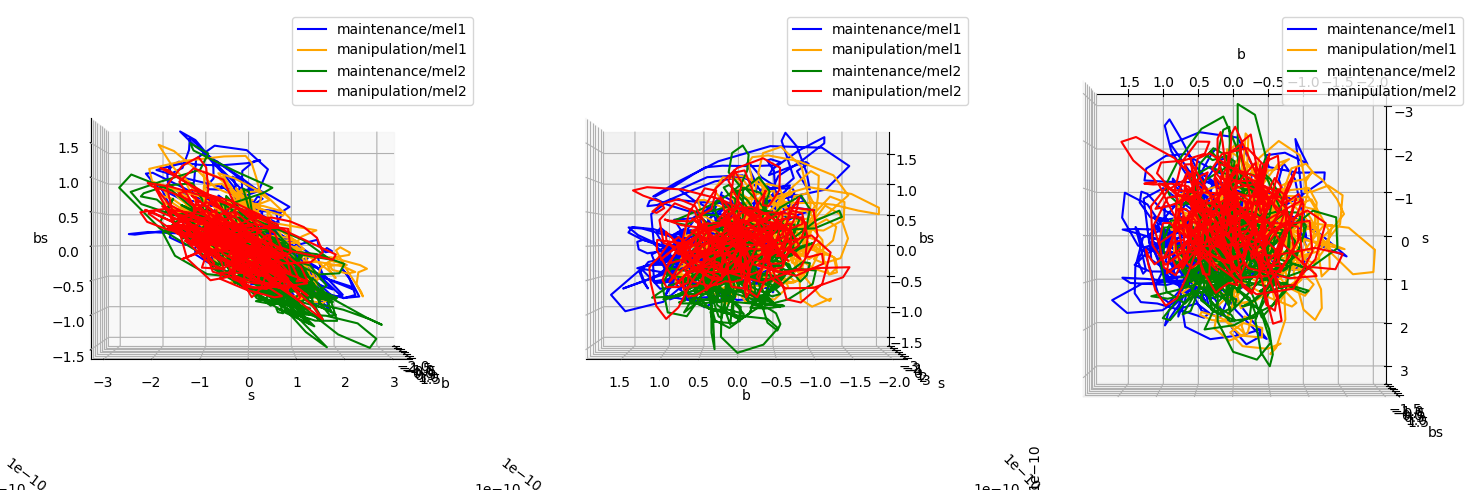

In [9]:
b_data = Z['b'][0, :, :, :]
s_data = Z['s'][0, :, :, :]
bs_data = Z['bs'][0, :, :, :]

colors = ['blue', 'green', 'orange', 'red']
labels = ['maintenance/mel1', 'maintenance/mel2', 'manipulation/mel1', 'manipulation/mel2']


fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')


for ax in [ax1, ax2, ax3]:
    for i in range(2):
        for j in range(2):
            ax.plot(b_data[i, j], s_data[i, j], bs_data[i, j], color=colors[i + j * 2], label=labels[i + j * 2])
    ax.set_xlabel('b')
    ax.set_ylabel('s')
    ax.set_zlabel('bs')
    ax.legend()


ax1.view_init(0, 0)
ax2.view_init(0, 90)
ax3.view_init(90, 90)


plt.tight_layout()
plt.savefig(f'{_id_}/latent_space.png')


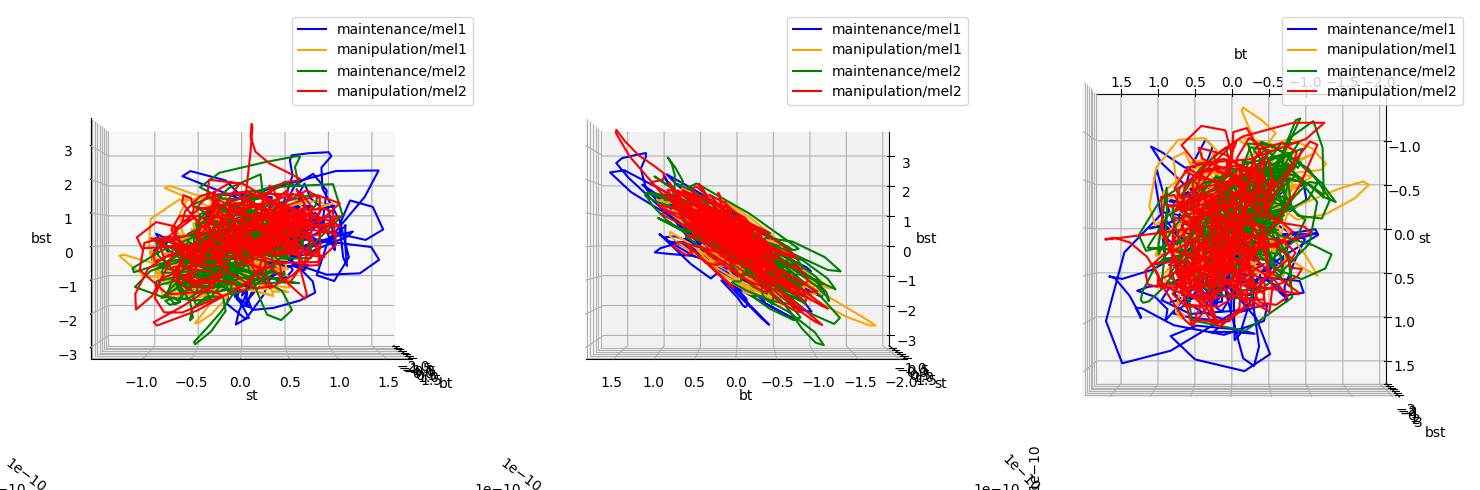

In [10]:
b_data = Z['bt'][0, :, :, :]
s_data = Z['st'][0, :, :, :]
bs_data = Z['bst'][0, :, :, :]

colors = ['blue', 'green', 'orange', 'red']
labels = ['maintenance/mel1', 'maintenance/mel2', 'manipulation/mel1', 'manipulation/mel2']


fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')


for ax in [ax1, ax2, ax3]:
    for i in range(2):
        for j in range(2):
            ax.plot(b_data[i, j], s_data[i, j], bs_data[i, j], color=colors[i + j * 2], label=labels[i + j * 2])
    ax.set_xlabel('bt')
    ax.set_ylabel('st')
    ax.set_zlabel('bst')
    ax.legend()


ax1.view_init(0, 0)
ax2.view_init(0, 90)
ax3.view_init(90, 90)


plt.tight_layout()
plt.savefig(f'{_id_}/latent_space(t).png')
plt.show()


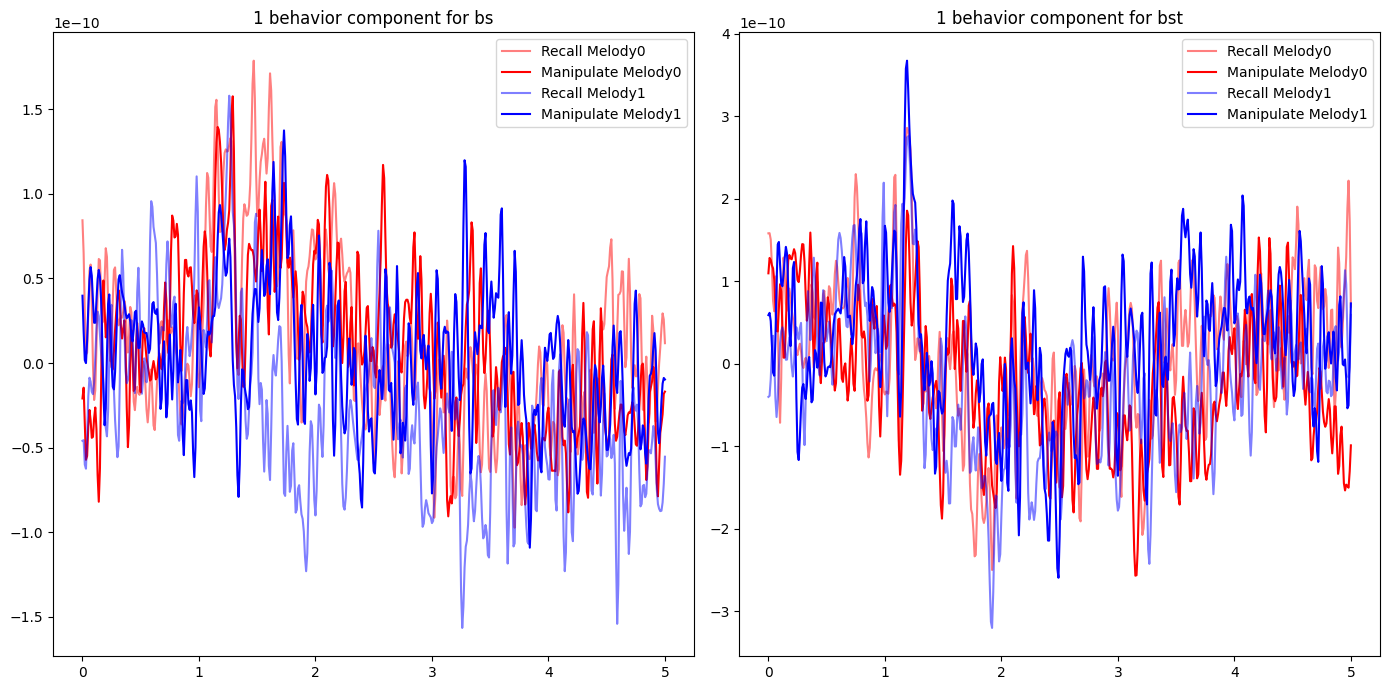

In [11]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0, 5, 501)
x = 1  # number of components to plot
S = 2  # number of melody types
melody_colors = ['r', 'b']

plt.figure(figsize=(7 * 2, 7 * x), dpi=100)

for index, (data, data_label) in enumerate([(Z['bs'], 'bs'), (Z['bst'], 'bst')]):
    for i in range(x):
        plt.subplot(x, 2, index+1)
        for s in range(S):
            for j in range(data.shape[-2]):
                color = melody_colors[s]
                alpha = 0.5 if j == 0 else 1
                label = f"{'Recall' if j == 0 else 'Manipulate'} Melody{s}"
                plt.plot(time, data[i, s, j], color=color, alpha=alpha, label=label)
                
        plt.title(f'{i+1} behavior component for {data_label}')
        plt.legend()

# Adjust the width of space between subplots
plt.subplots_adjust(wspace=0.3)  # Adjust this value as per your preference

plt.tight_layout()
plt.savefig(f'{_id_}/component.png')
plt.show()


In [12]:
for cz in Z:
    components = np.abs(mdpca.P[cz])
    print(components.shape)
    break

(306, 10)


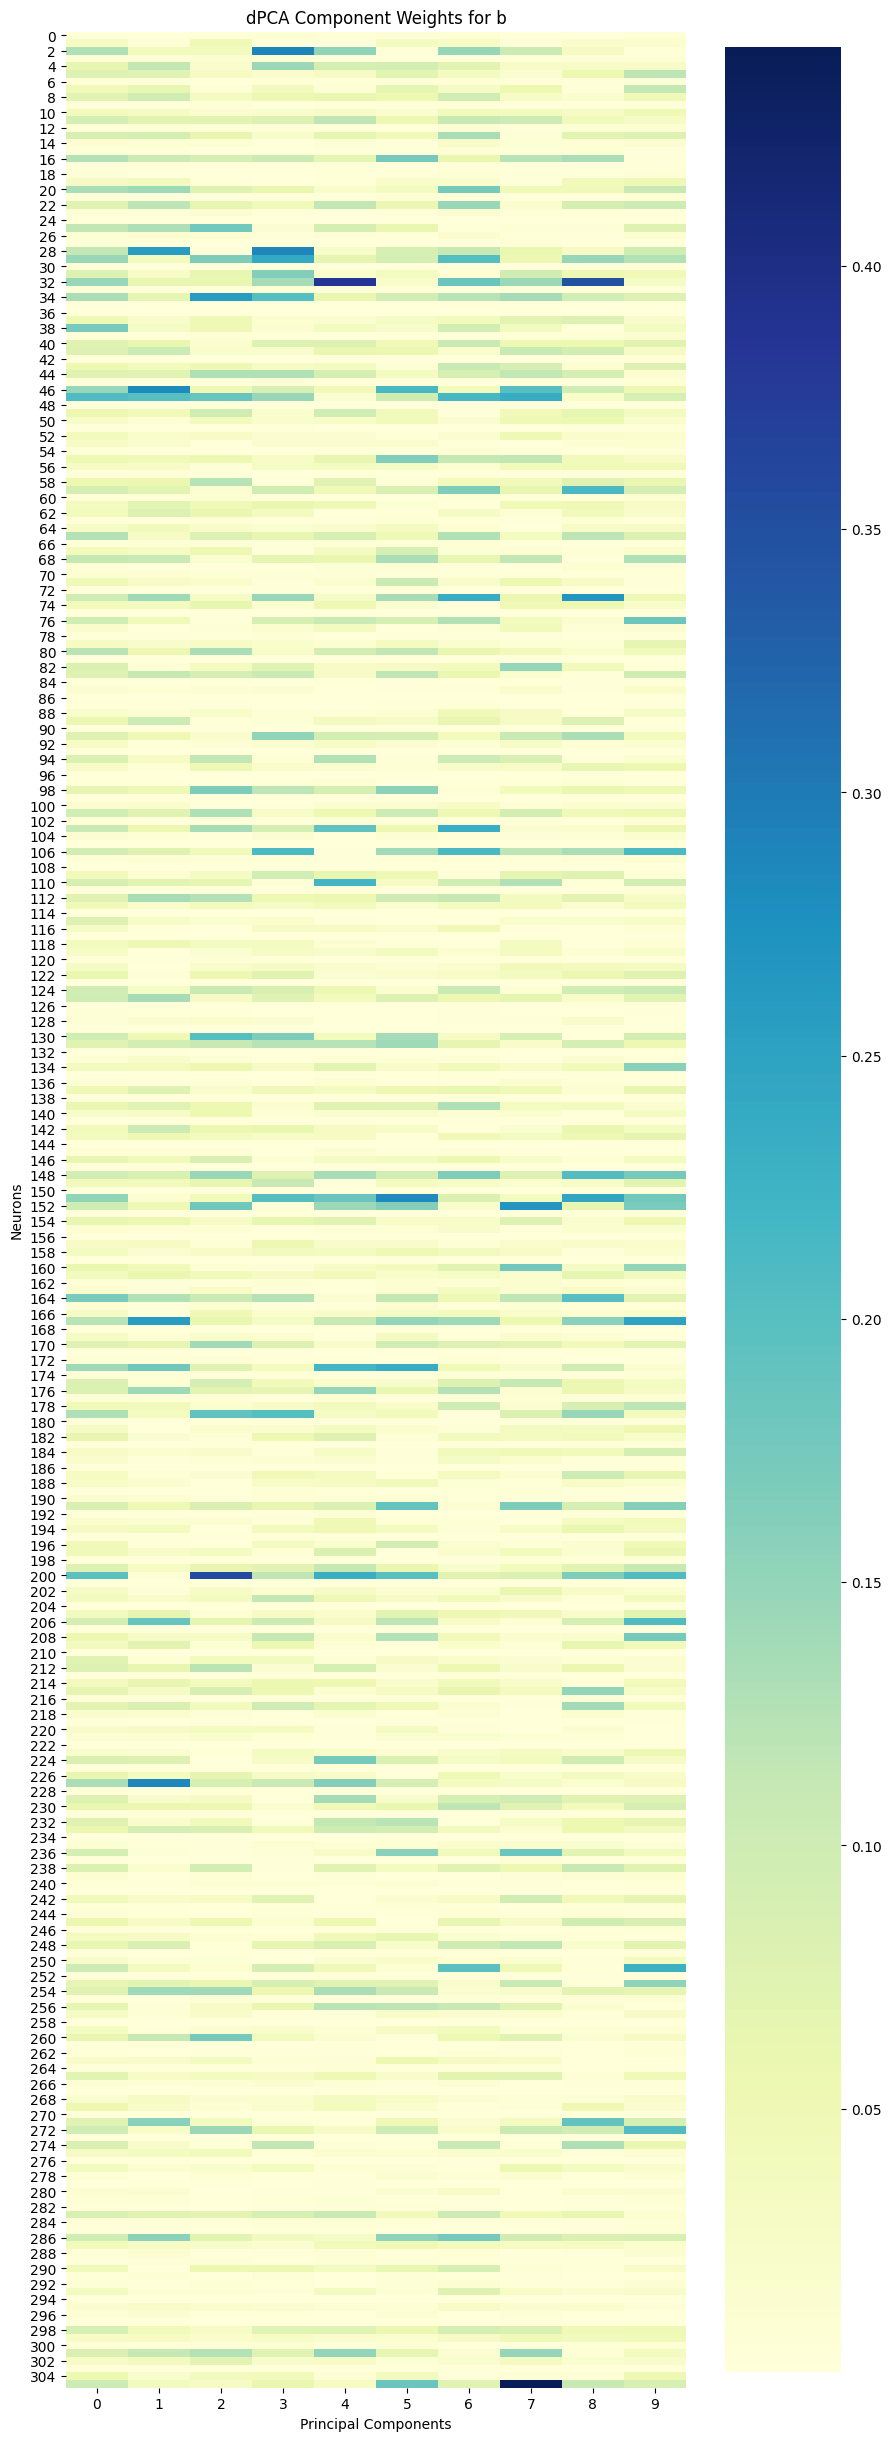

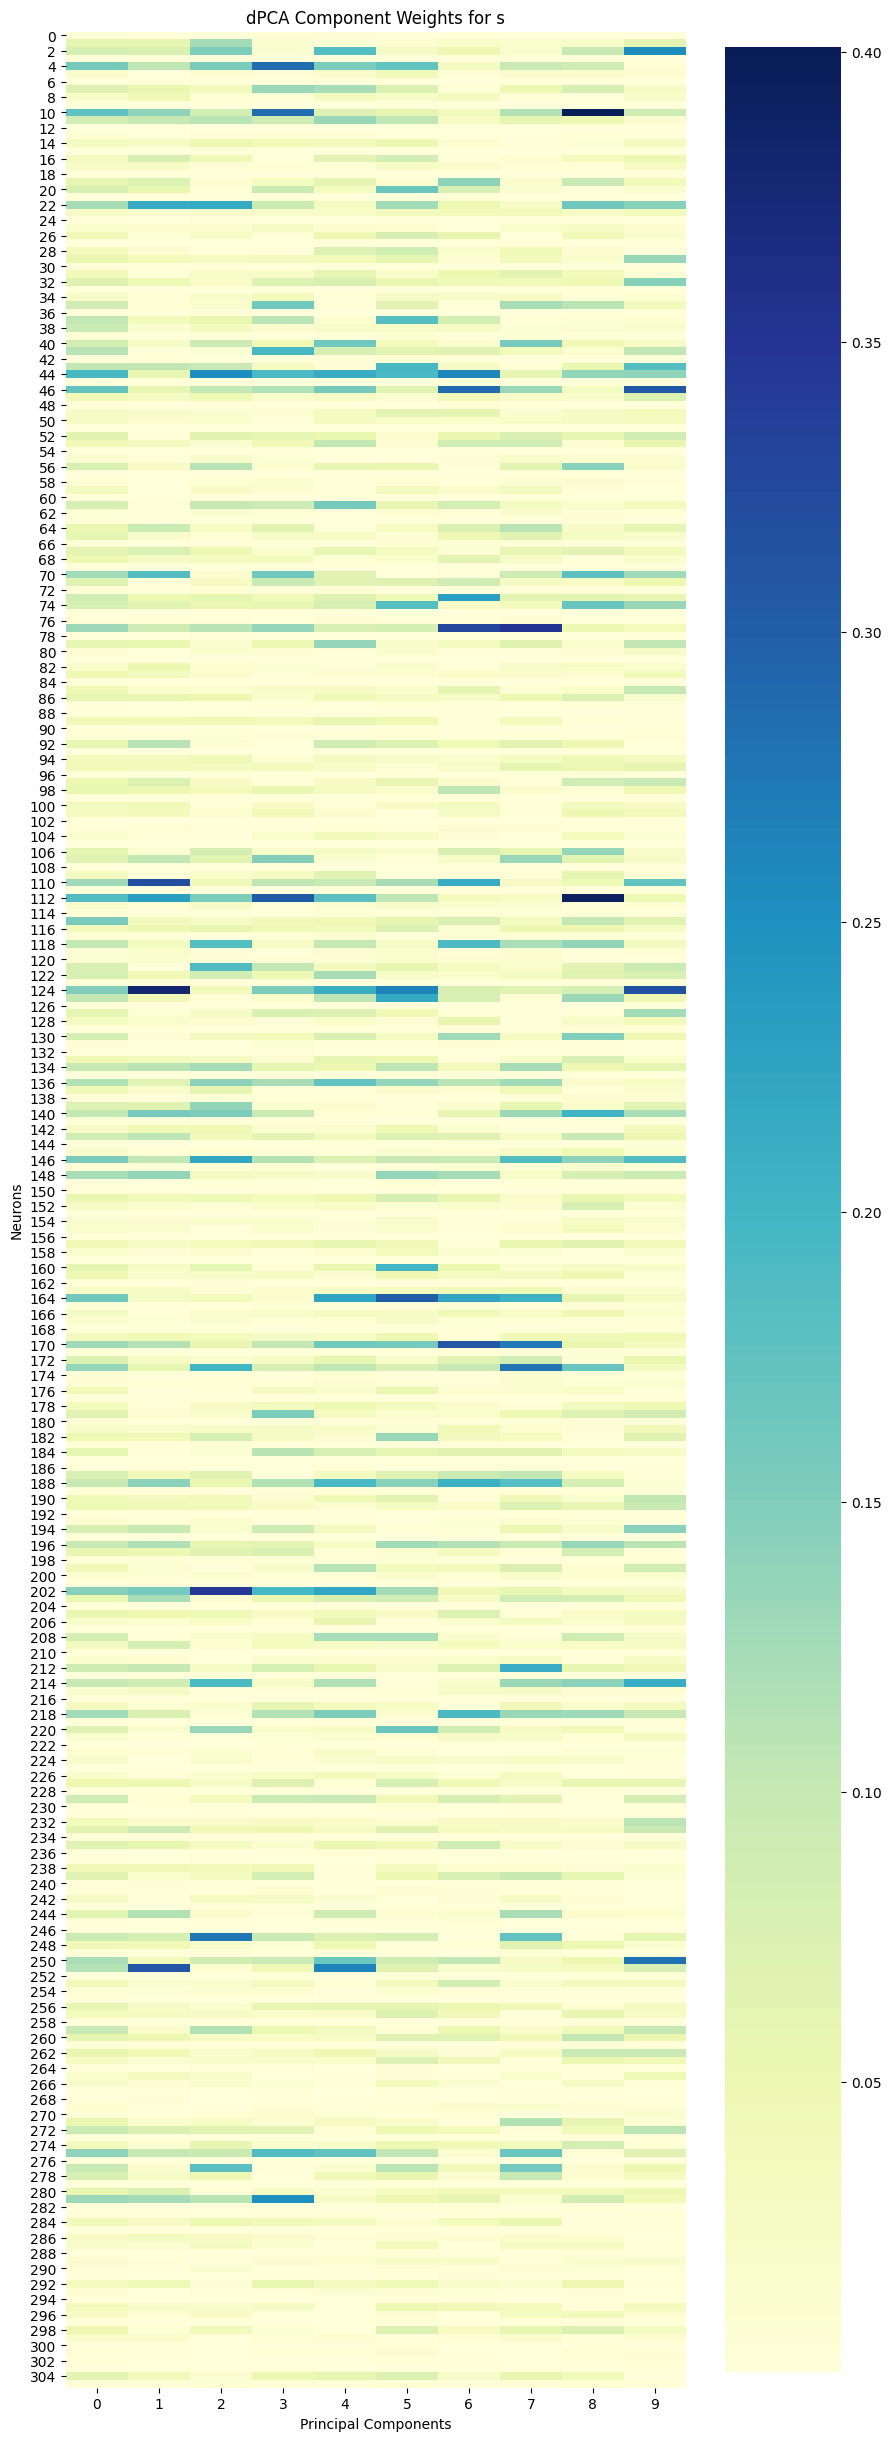

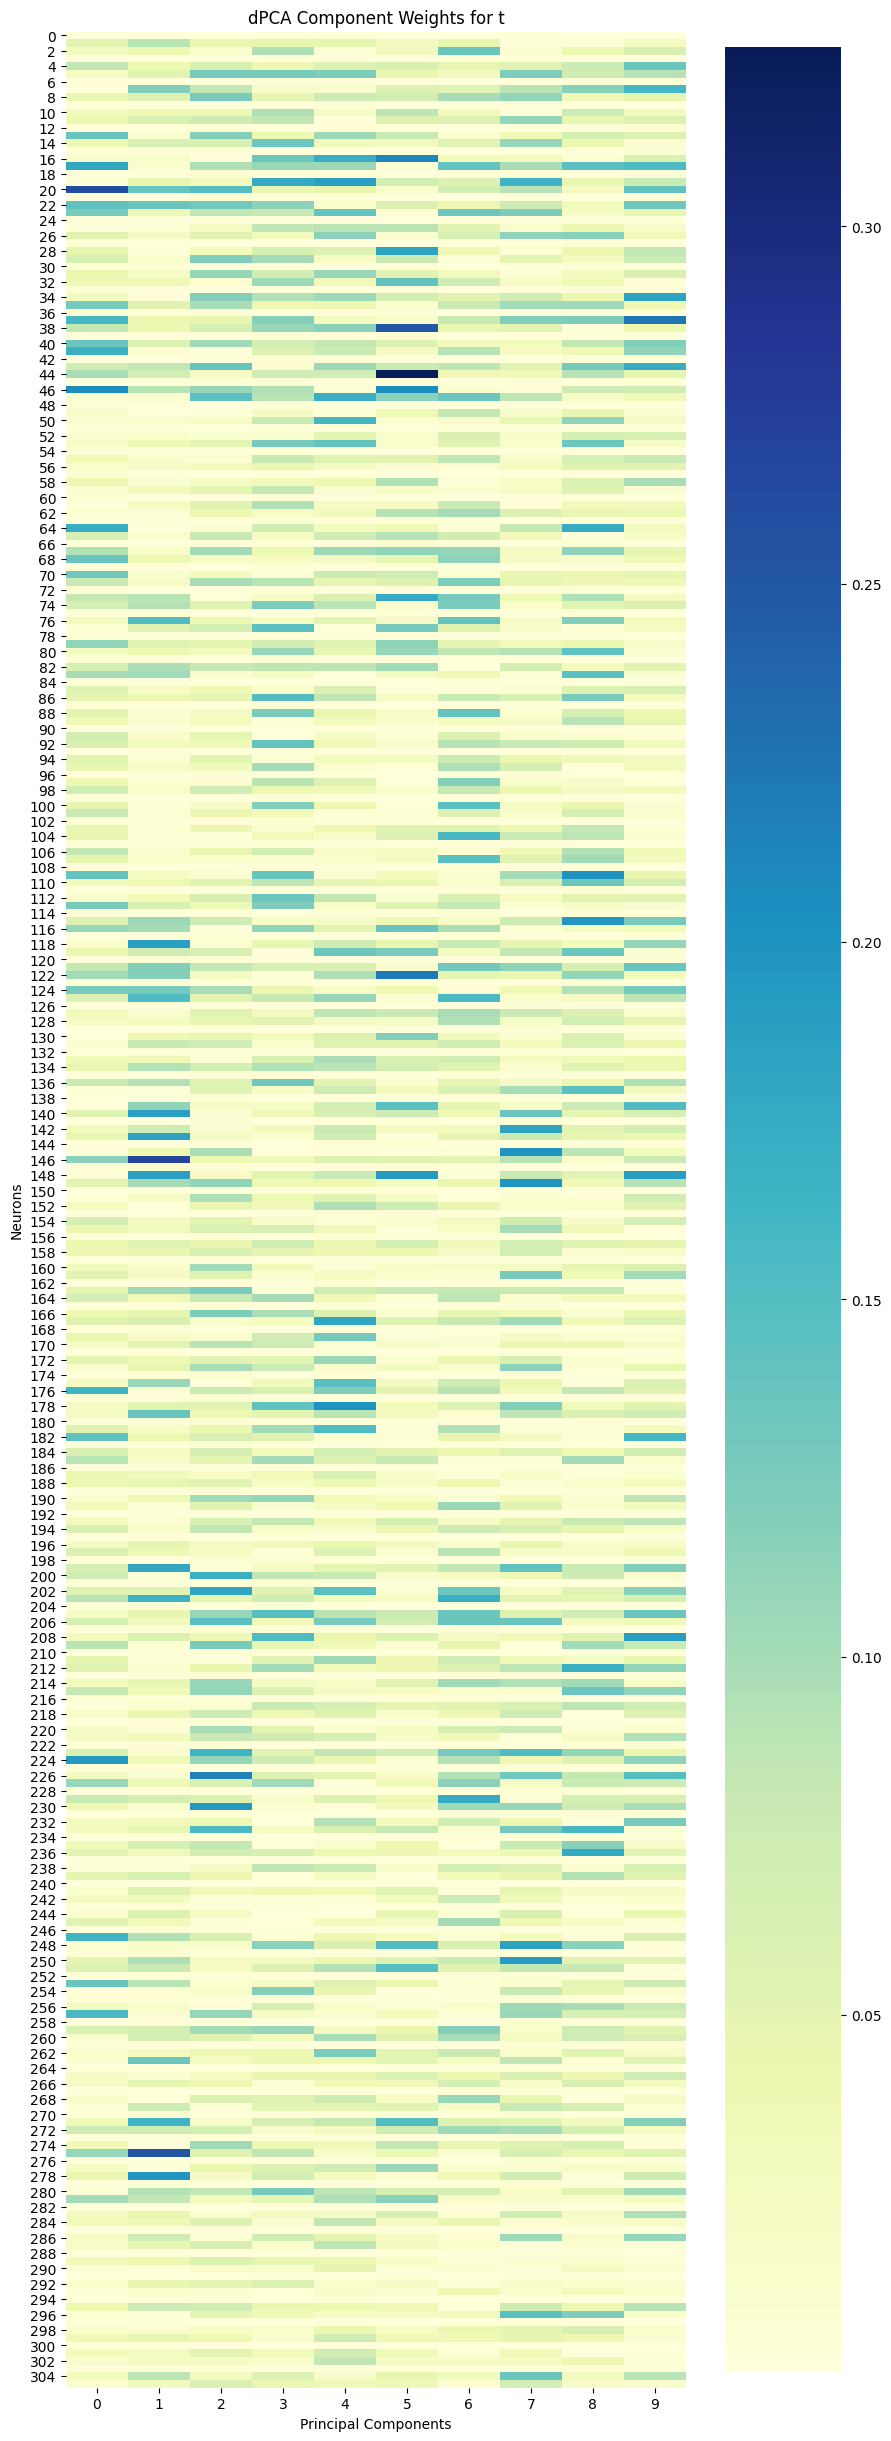

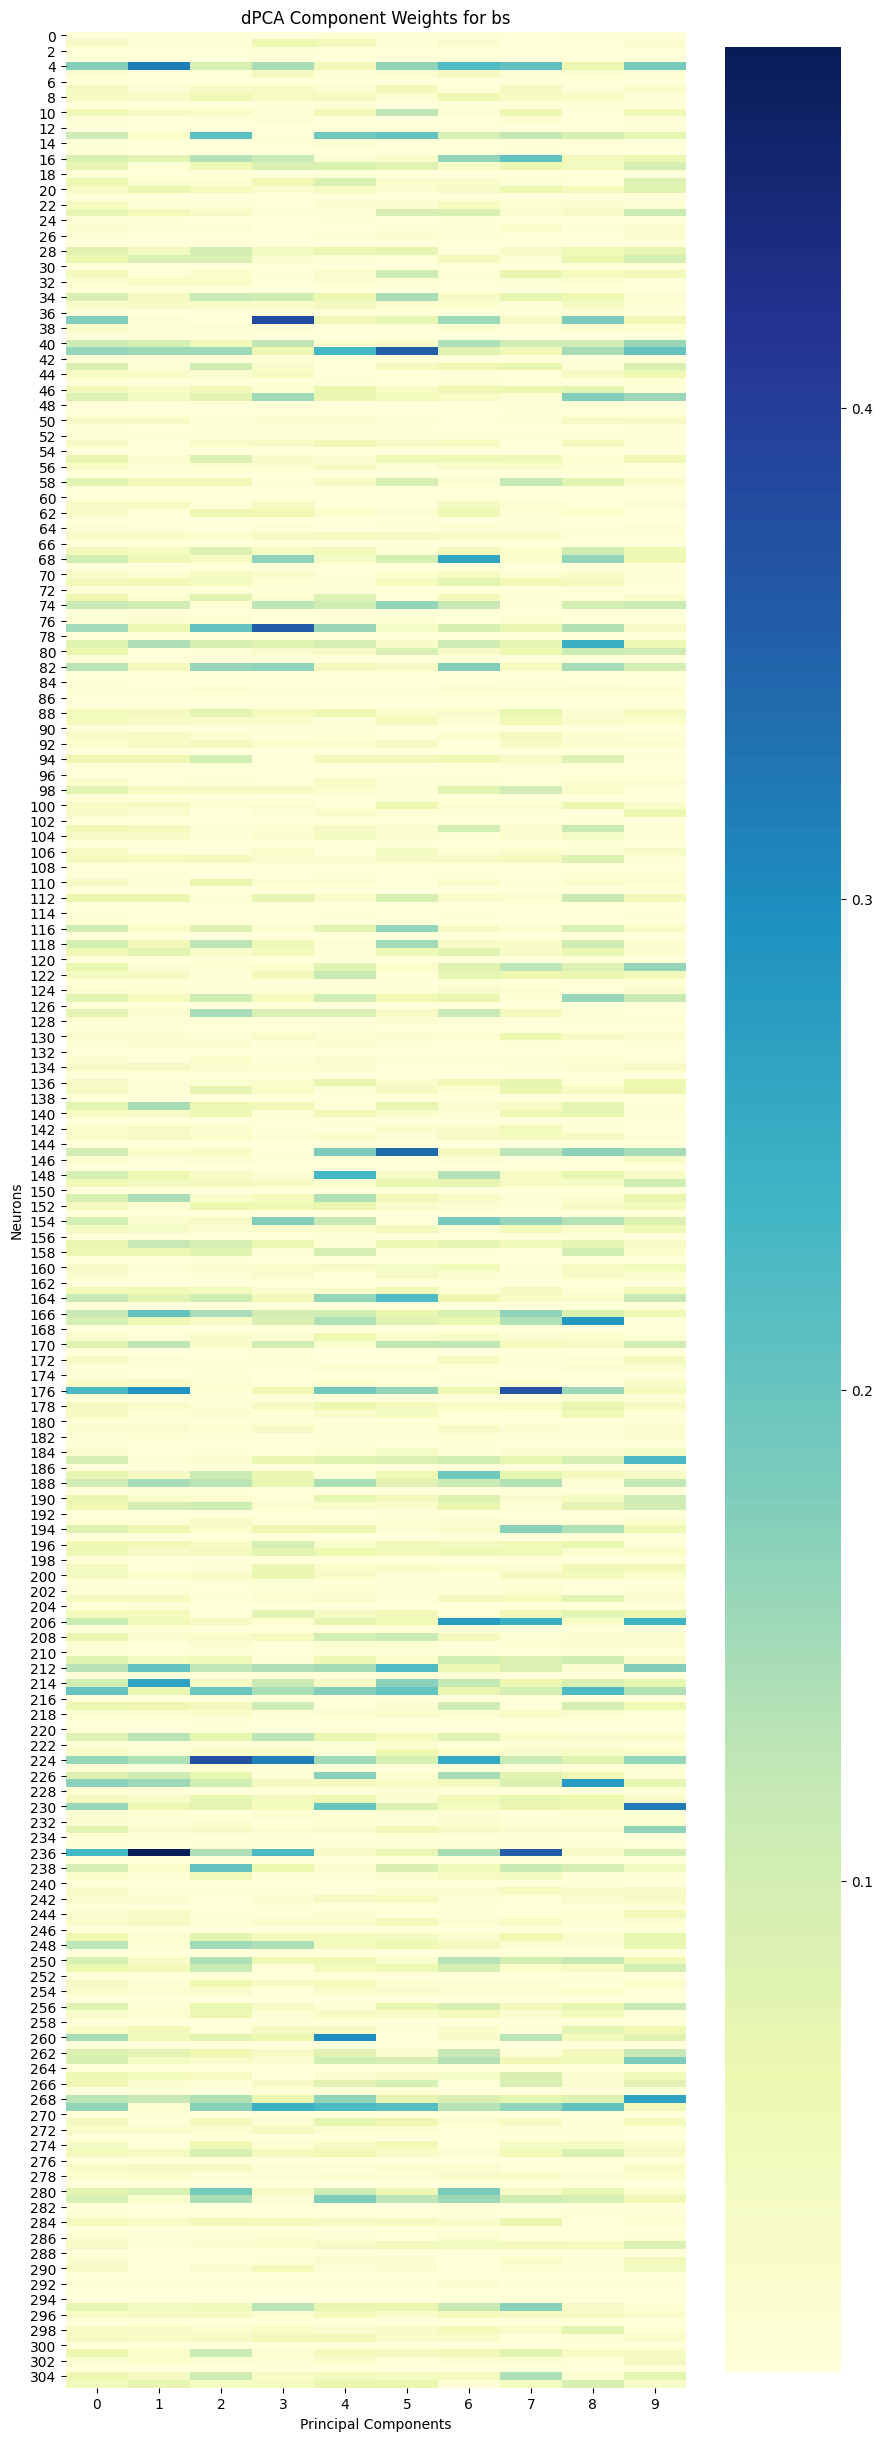

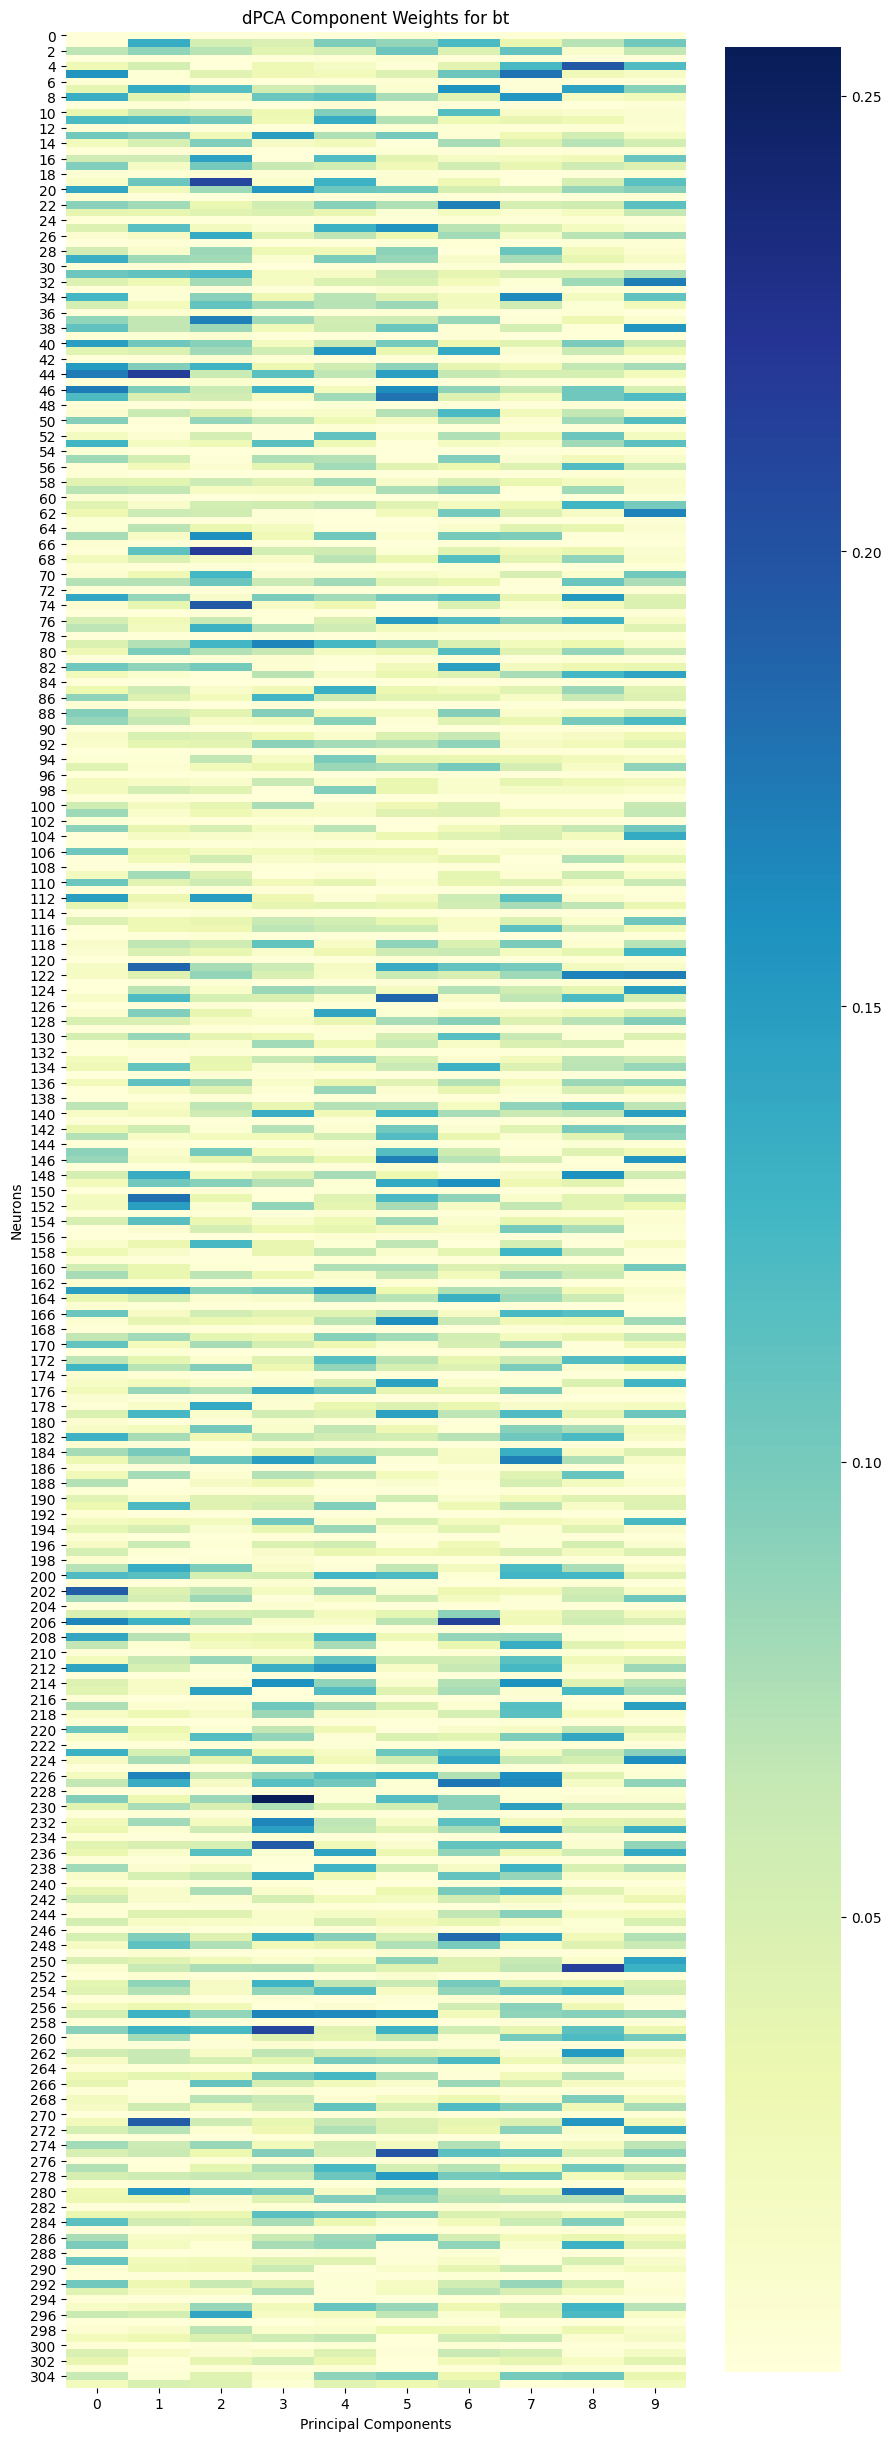

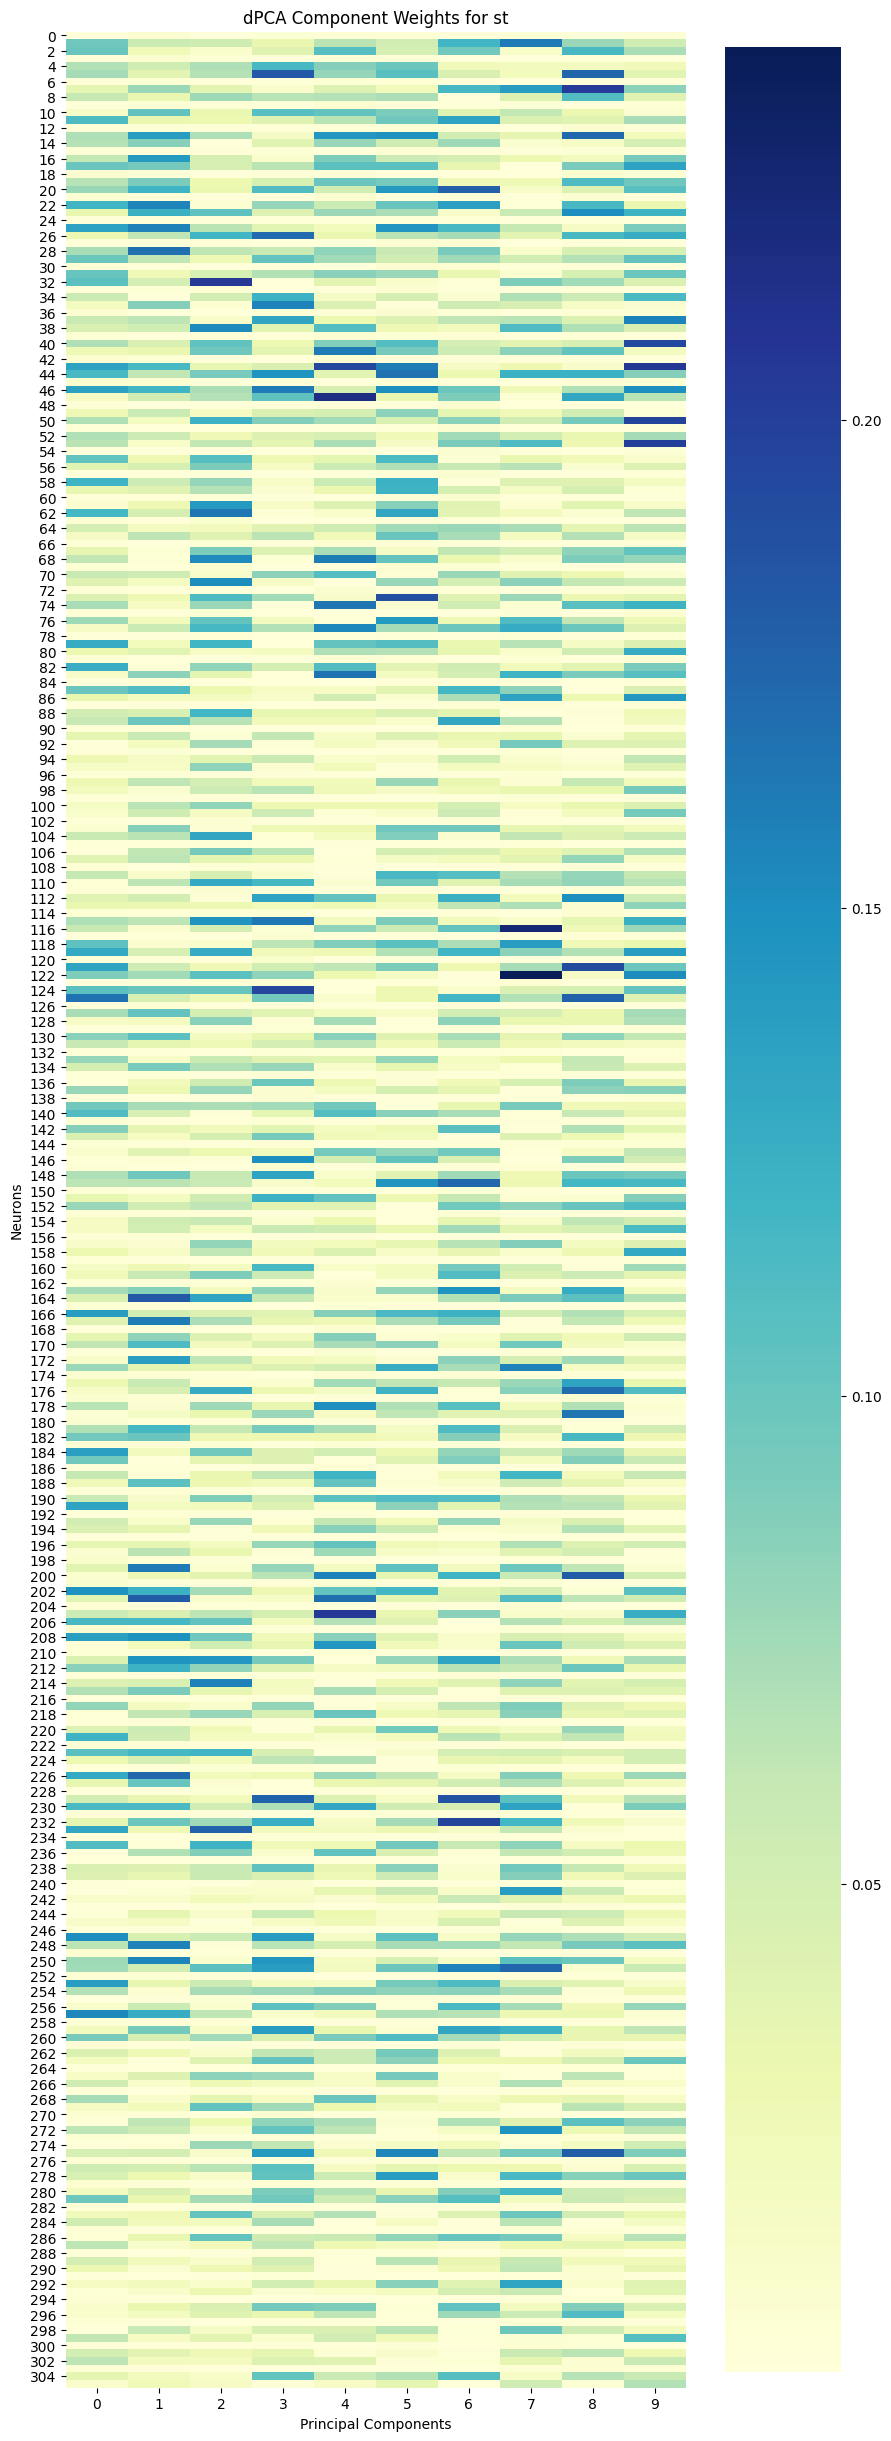

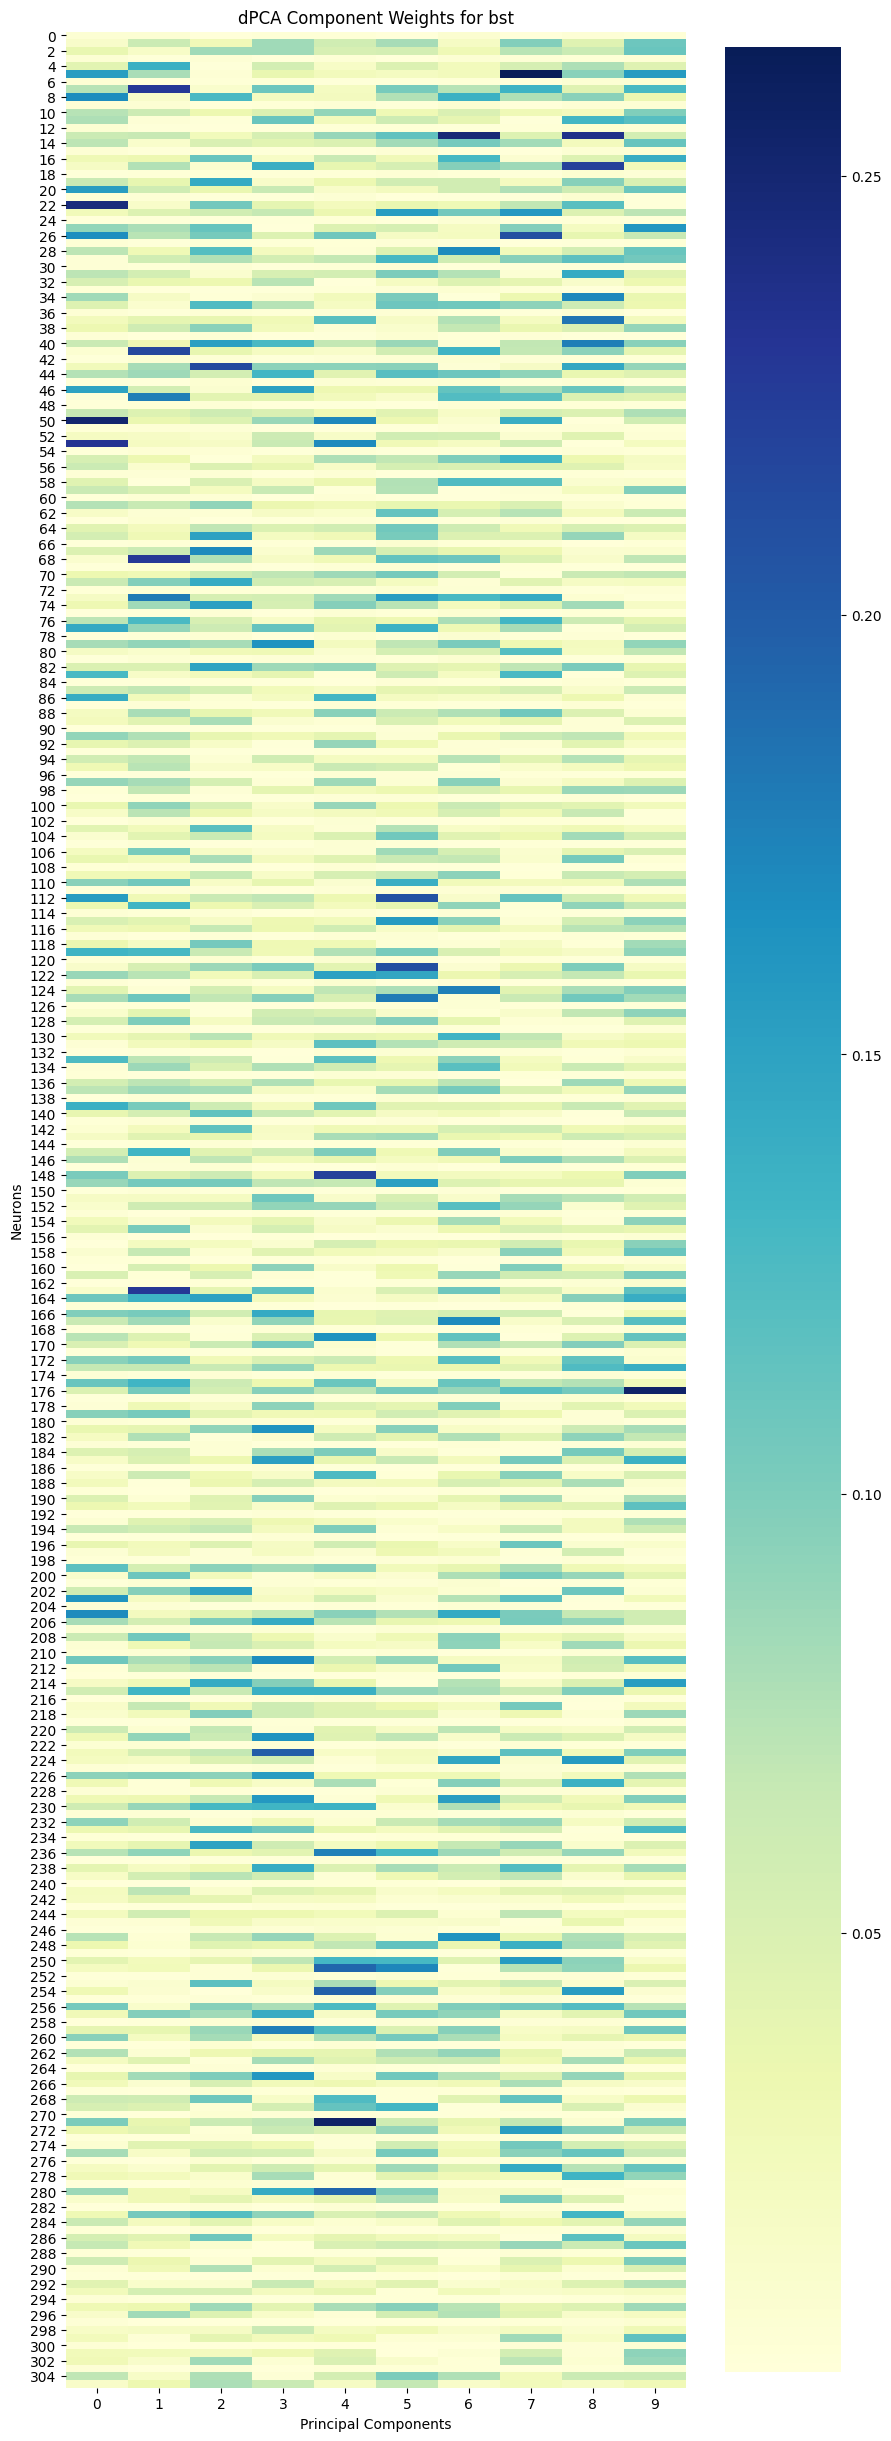

In [13]:
for cz in Z:
    components = np.abs(mdpca.P[cz])
    
    num_rows, num_columns = components.shape

    
    height_per_row = 0.1  

    plt.figure(figsize=(10, num_rows * height_per_row))

    sns.heatmap(components, cmap="YlGnBu", cbar=True)  
    plt.xlabel('Principal Components')
    plt.ylabel('Neurons')
    plt.title(f'dPCA Component Weights for {cz}')  
    plt.savefig(f'{_id_}/dPCA_Component_Weights_for_{cz}.png')
    plt.show()

<ipython-input-14-b18a672f80ab>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


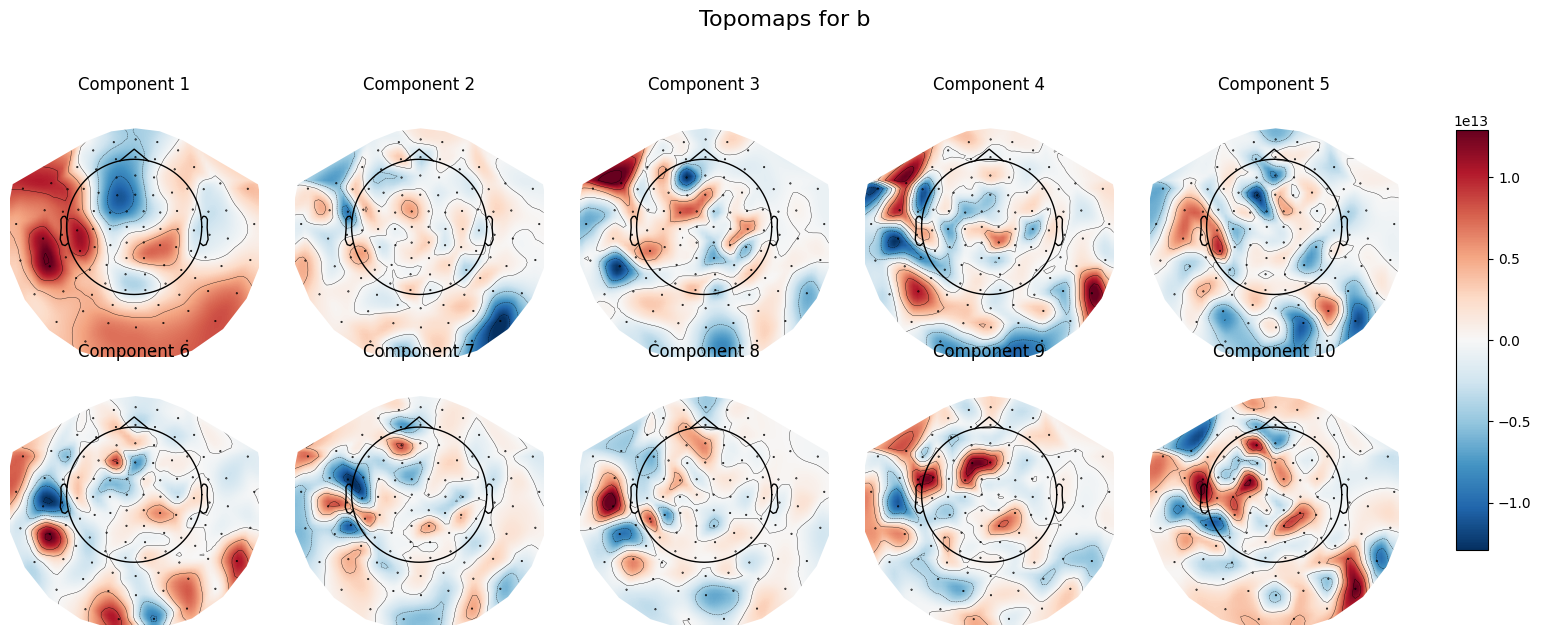

<ipython-input-14-b18a672f80ab>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


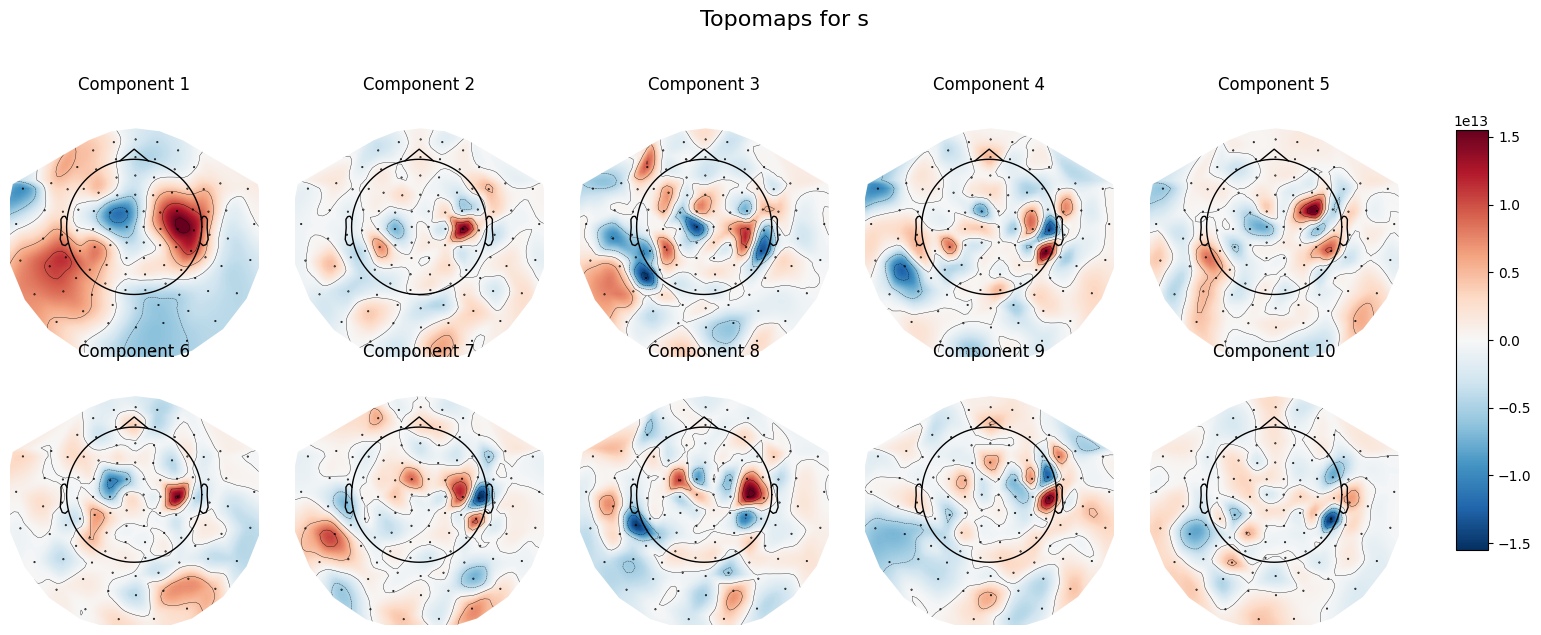

<ipython-input-14-b18a672f80ab>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


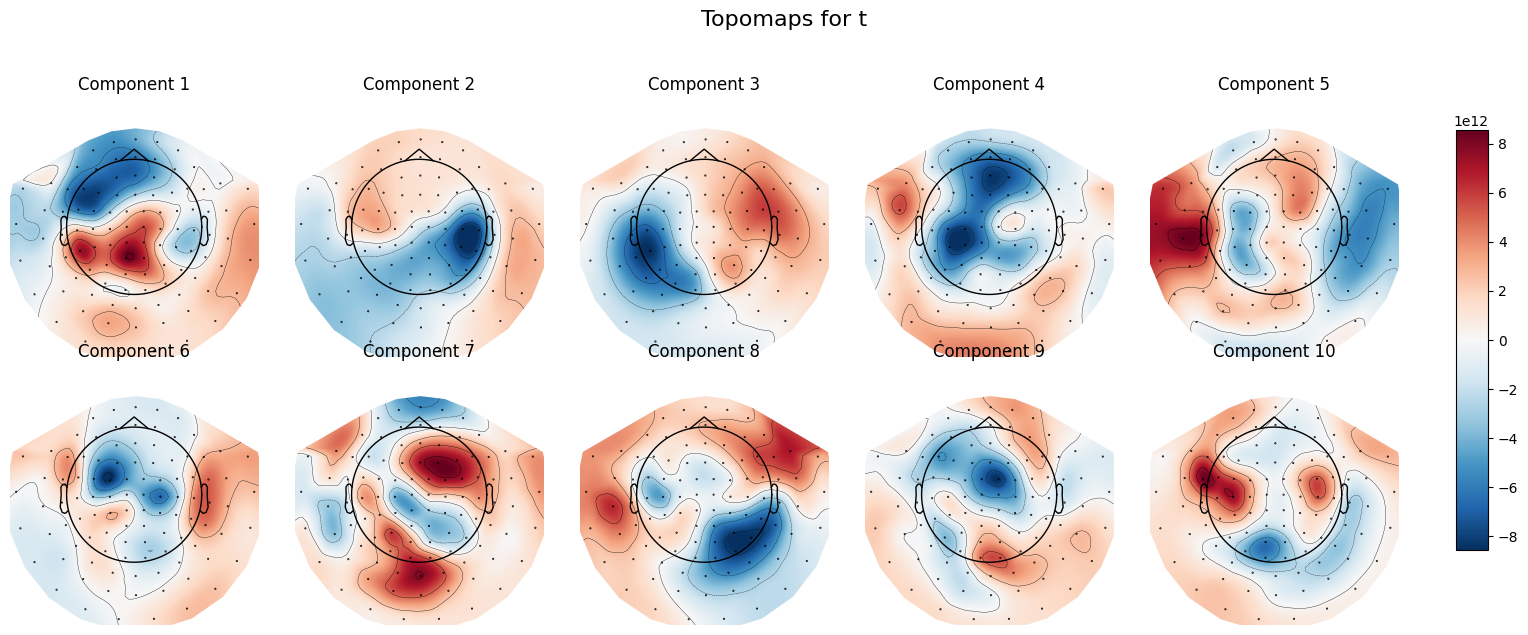

<ipython-input-14-b18a672f80ab>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


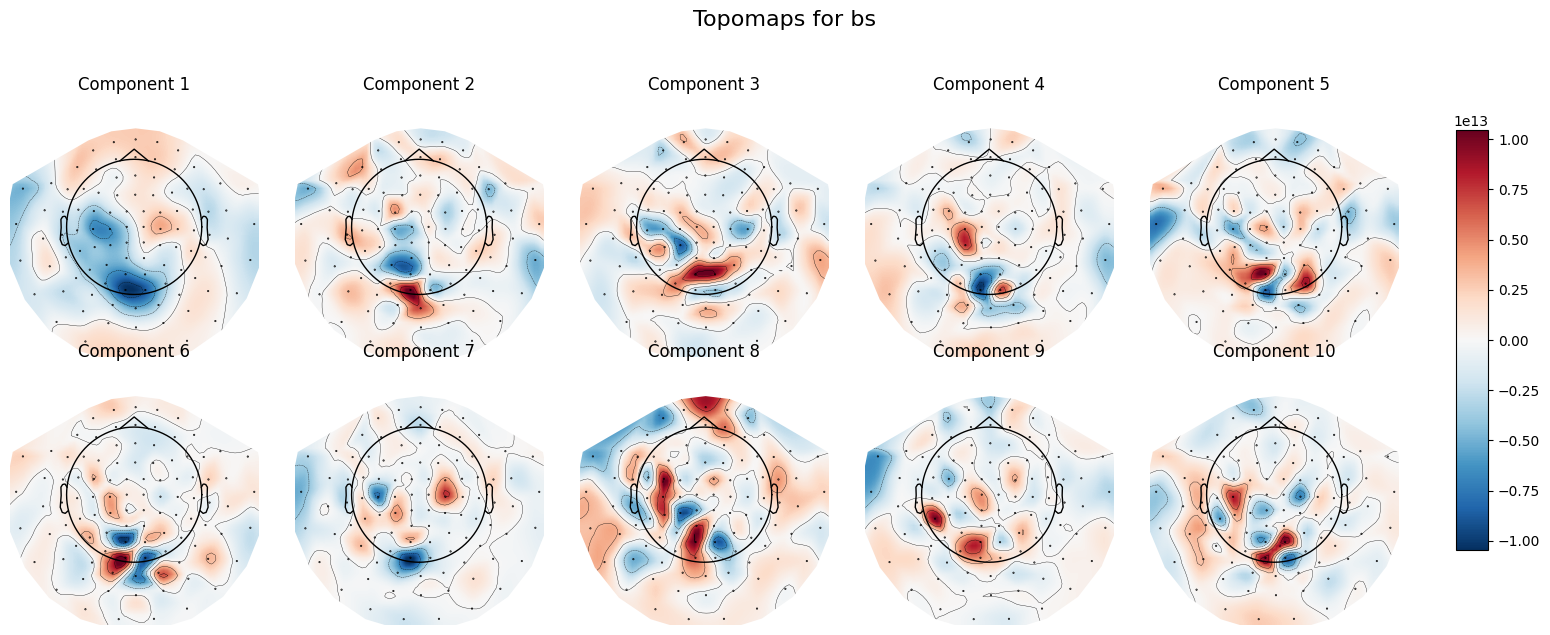

<ipython-input-14-b18a672f80ab>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


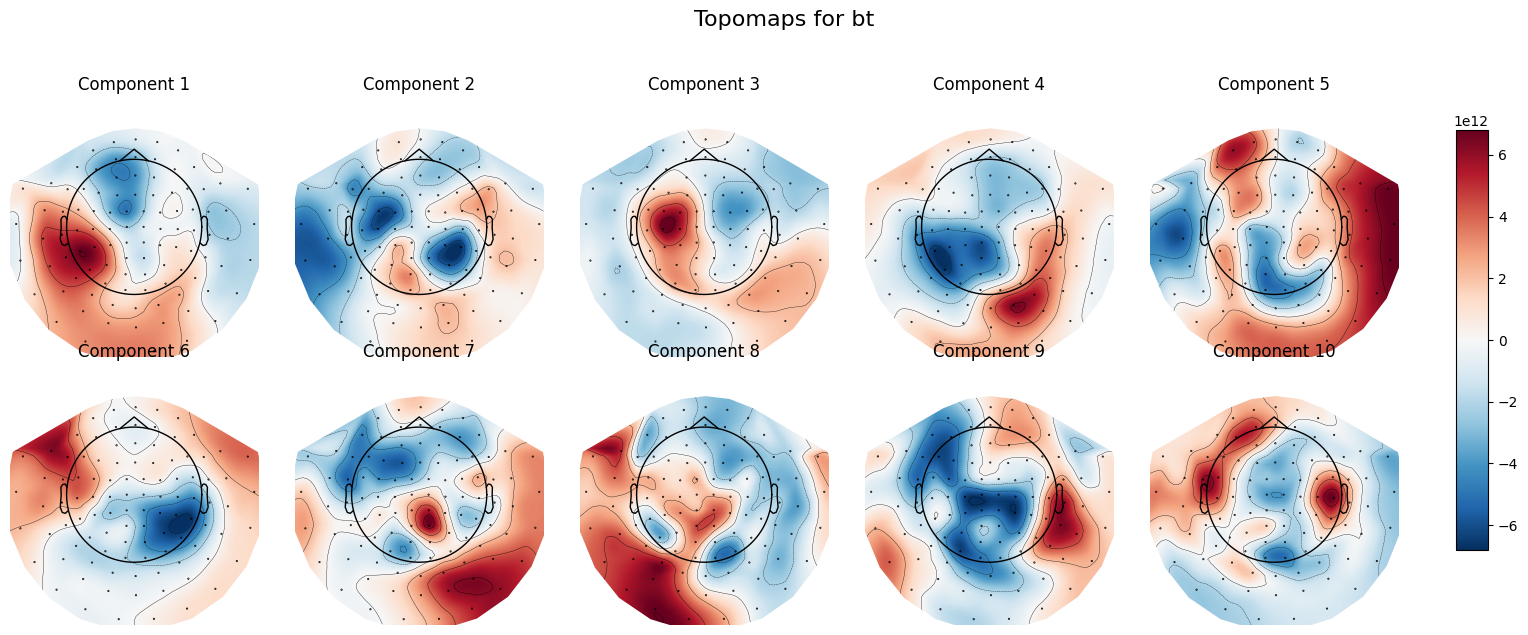

<ipython-input-14-b18a672f80ab>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


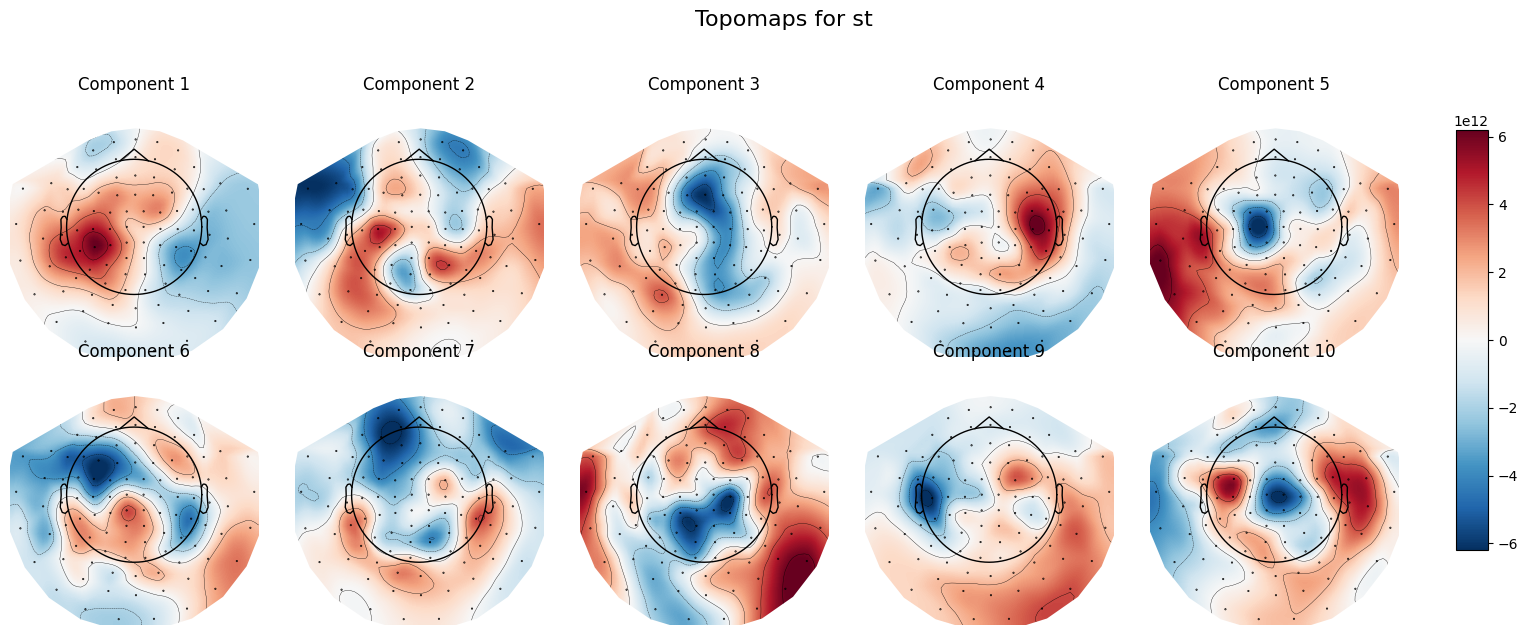

<ipython-input-14-b18a672f80ab>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


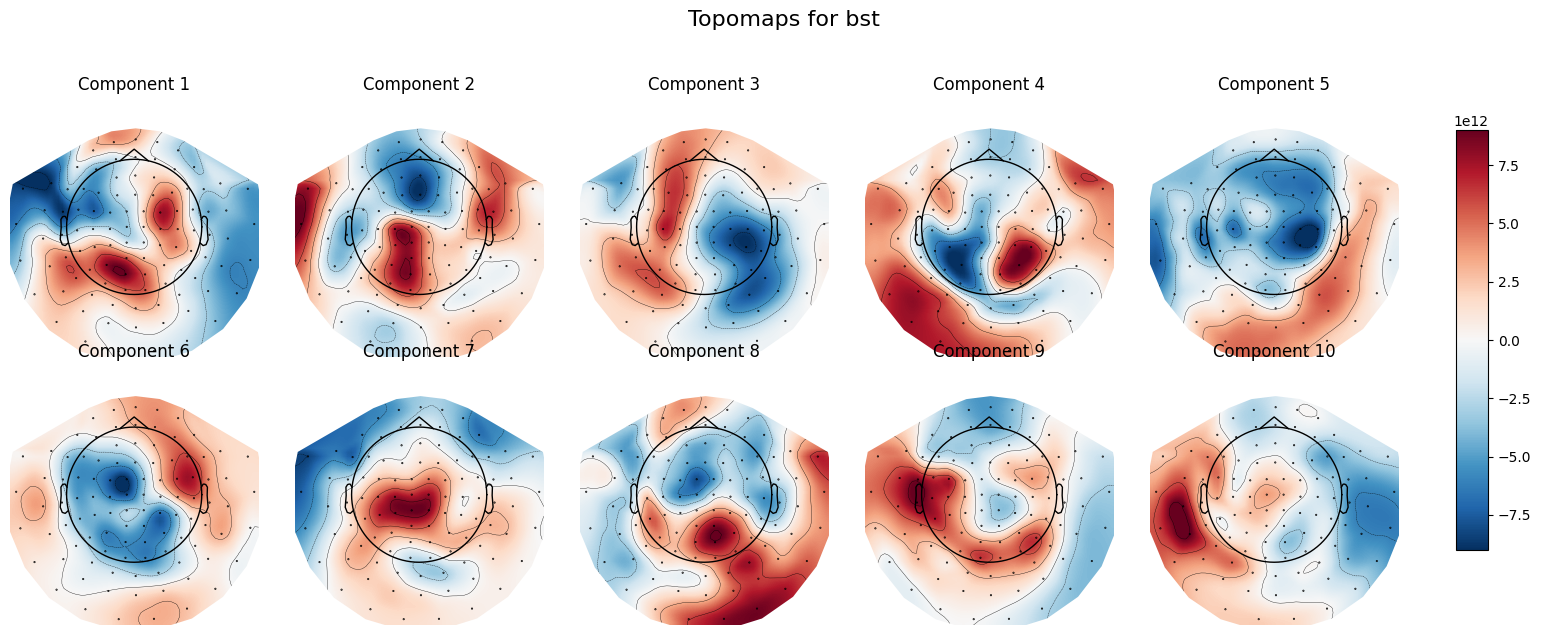

In [14]:
info = recall_epochs.info
picked_channels = mne.pick_types(info, meg=True, eeg=False, stim=False, eog=False,
                                 exclude='bads')
info_picked = mne.pick_info(info, picked_channels)

for cz in Z:
    components = mdpca.P[cz]
    
    fig, main_axes = plt.subplots(2, 5, figsize=(16, 6))
    
    vmin = components.min()
    vmax = components.max()
    
    for idx, ax in enumerate(main_axes.ravel()):
        component = components[:, idx]
        evoked_array = mne.EvokedArray(component[:, np.newaxis], info_picked, tmin=0)
        
        # 设置色标的范围从0到components的最大值
        evoked_array.plot_topomap(times=[0], axes=ax, colorbar=False, show=False, 
                                  outlines='head', sensors=True)
                                  # , ch_type = 'grad')
        # ax.images[0].set_clim(vmin, vmax)
        ax.set_title(f'Component {idx + 1}')

    # 为色标创建一个新的轴
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    fig.colorbar(ax.images[0], cax=cbar_ax)

    fig.suptitle(f'Topomaps for {cz}', fontsize=16, y=1.05)
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.savefig(f'{_id_}/Topomaps_for_{cz}.png')
    plt.show()